### K Nearest Neighbor

K = number of nearest neighborsm

Calculate the distance of the point from the k nearest neighbors

Calculate how many nearest neighbors belongs to class 1 and how many to class 2

Choose the classes based on that

##### How to calculate the distance?

1) Eucledian Distance

2) Manhattan Distance

Euclidean distance: \(d=\sqrt{(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}}\) 

Manhattan distance: \(d=|x_{2}-x_{1}|+|y_{2}-y_{1}|\)

![](distance.png)

#### What will happen if dataset is imbalanced?

KNN will be biased

KNN will get impacted, because of imbalanced datasets

#### What will happen if dataset is having outliers?

Again KNN will be biased

KNN will get impacted because of Outliers

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/110119076/testing/refs/heads/main/Classified_Data.csv", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [49]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [50]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.30)

##### Using KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
pred = knn.predict(X_test)

In [57]:
pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], d

#### Predictions and Evaluations

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
confusion_matrix(y_test,pred)

array([[141,  16],
       [ 12, 131]], dtype=int64)

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       157
           1       0.89      0.92      0.90       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [64]:
len(pred)

300

In [66]:
np.sum(pred != y_test)

28

In [67]:
28/300

0.09333333333333334

In [68]:
np.mean(pred != y_test)

0.09333333333333334

#### Choosing a K value

In [69]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

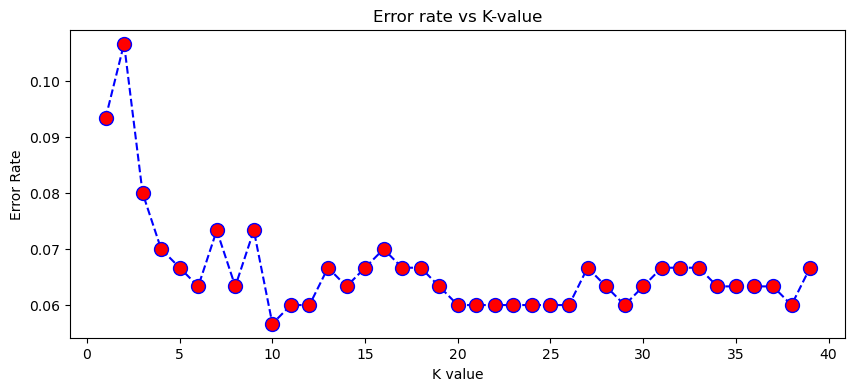

In [70]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error rate vs K-value")
plt.xlabel("K value")
plt.ylabel("Error Rate")
plt.show()

K- value from 20 to 25 looks perfect

In [71]:
knn23 = KNeighborsClassifier(n_neighbors=23)

In [72]:
knn23.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [75]:
pred23 = knn23.predict(X_test)

In [76]:
confusion_matrix(y_test,pred23)

array([[143,  14],
       [  4, 139]], dtype=int64)

In [77]:
print(classification_report(y_test,pred23))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       157
           1       0.91      0.97      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Wow!! That's an improvement across all the metrics